Installing the required libraries.

In [63]:
!pip install yfinance
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Imported the required fields.

In [74]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas_datareader as web
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline


# Defining Stocks
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'META'] 
# Creating dates
start_date ='1990-01-01'
end_date ='2023-01-01'
#Retriving data
stock_data = yf.download(symbols, start_date, end_date)
# View data
stock_data.tail(10)

[*********************100%***********************]  5 of 5 completed


Adj Close                                    \
                                 AAPL       AMZN       GOOG        META   
Date                                                                      
2022-12-16 00:00:00-05:00  134.509995  87.860001  90.860001  119.430000   
2022-12-19 00:00:00-05:00  132.369995  84.919998  89.150002  114.480003   
2022-12-20 00:00:00-05:00  132.300003  85.190002  89.629997  117.089996   
2022-12-21 00:00:00-05:00  135.449997  86.769997  90.250000  119.760002   
2022-12-22 00:00:00-05:00  132.229996  83.790001  88.260002  117.120003   
2022-12-23 00:00:00-05:00  131.860001  85.250000  89.809998  118.040001   
2022-12-27 00:00:00-05:00  130.029999  83.040001  87.930000  116.879997   
2022-12-28 00:00:00-05:00  126.040001  81.820000  86.459999  115.620003   
2022-12-29 00:00:00-05:00  129.610001  84.180000  88.949997  120.260002   
2022-12-30 00:00:00-05:00  129.929993  84.000000  88.730003  120.339996   

                                            Close                        \
                                 MSFT        AAPL       AMZN       GOOG   
Date                                                                      
2022-12-16 00:00:00-05:00  244.690002  134.509995  87.860001  90.860001   
2022-12-19 00:00:00-05:00  240.449997  132.369995  84.919998  89.150002   
2022-12-20 00:00:00-05:00  241.800003  132.300003  85.190002  89.629997   
2022-12-21 00:00:00-05:00  244.429993  135.449997  86.769997  90.250000   
2022-12-22 00:00:00-05:00  238.190002  132.229996  83.790001  88.260002   
2022-12-23 00:00:00-05:00  238.729996  131.860001  85.250000  89.809998   
2022-12-27 00:00:00-05:00  236.960007  130.029999  83.040001  87.930000   
2022-12-28 00:00:00-05:00  234.529999  126.040001  81.820000  86.459999   
2022-12-29 00:00:00-05:00  241.009995  129.610001  84.180000  88.949997   
2022-12-30 00:00:00-05:00  239.820007  129.929993  84.000000  88.730003   

                                                   ...        Open             \
                                 META        MSFT  ...        AAPL       AMZN   
Date                                               ...                          
2022-12-16 00:00:00-05:00  119.430000  244.690002  ...  136.690002  88.269997   
2022-12-19 00:00:00-05:00  114.480003  240.449997  ...  135.110001  87.510002   
2022-12-20 00:00:00-05:00  117.089996  241.800003  ...  131.389999  85.330002   
2022-12-21 00:00:00-05:00  119.760002  244.429993  ...  132.979996  86.180000   
2022-12-22 00:00:00-05:00  117.120003  238.190002  ...  134.350006  85.519997   
2022-12-23 00:00:00-05:00  118.040001  238.729996  ...  130.919998  83.250000   
2022-12-27 00:00:00-05:00  116.879997  236.960007  ...  131.380005  84.970001   
2022-12-28 00:00:00-05:00  115.620003  234.529999  ...  129.669998  82.800003   
2022-12-29 00:00:00-05:00  120.260002  241.009995  ...  127.989998  82.870003   
2022-12-30 00:00:00-05:00  120.339996  239.820007  ...  128.410004  83.120003   

                                                                 Volume  \
                                GOOG        META        MSFT       AAPL   
Date                                                                      
2022-12-16 00:00:00-05:00  91.199997  120.230003  248.550003  160156900   
2022-12-19 00:00:00-05:00  90.879997  116.830002  244.860001   79592600   
2022-12-20 00:00:00-05:00  88.730003  113.260002  239.399994   77432800   
2022-12-21 00:00:00-05:00  89.730003  116.699997  241.690002   85928000   
2022-12-22 00:00:00-05:00  88.930000  117.199997  241.259995   77852100   
2022-12-23 00:00:00-05:00  87.620003  116.029999  236.110001   63814900   
2022-12-27 00:00:00-05:00  89.309998  117.930000  238.699997   69007800   
2022-12-28 00:00:00-05:00  87.500000  116.250000  236.889999   85438400   
2022-12-29 00:00:00-05:00  87.029999  116.400002  235.649994   75703700   
2022-12-30 00:00:00-05:00  87.364998  118.160004  238.210007   76960600   

                                              

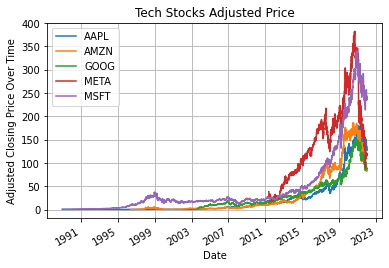

In [65]:
#  Set the x label to "Date". Set the y label to "Adjusted Closing Price Over Time". Set the graph title to "Tech Stocks Adjusted Price".
# 1. Data Visualization 
adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.grid()
plt.show()

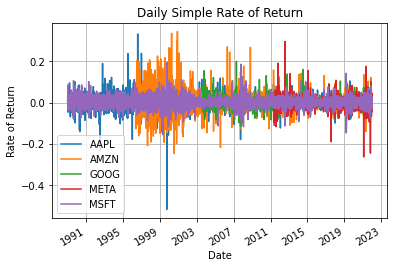

In [80]:
# 2. The daily simple rate of return over time.
daily_return = adj_date.pct_change()
daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.grid()
plt.show()

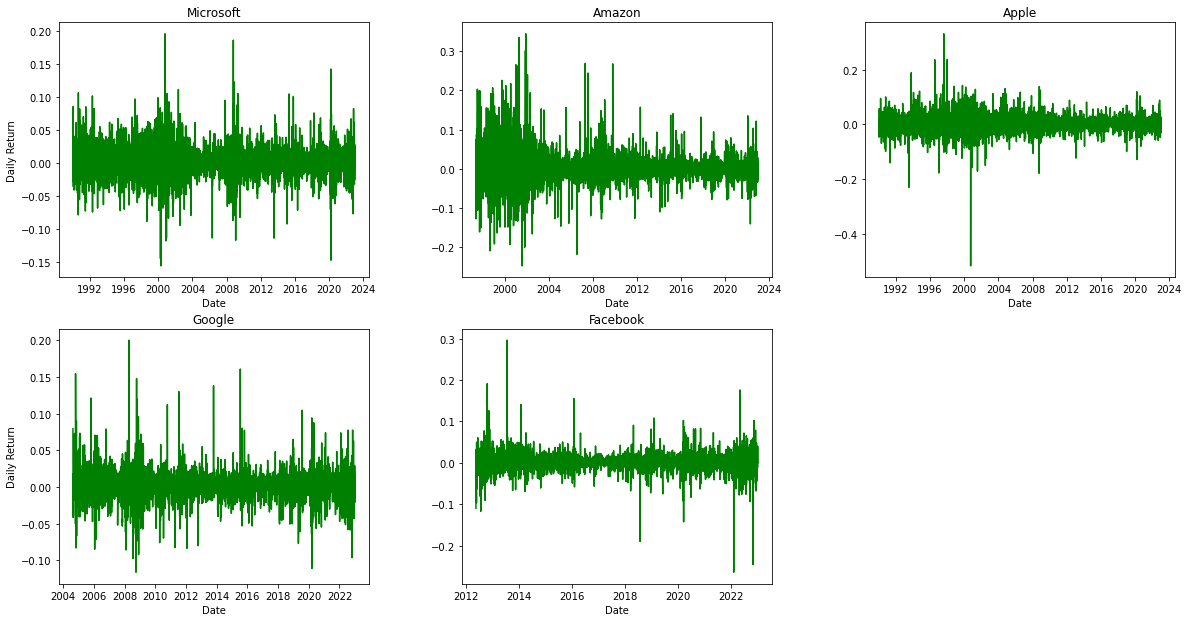

In [81]:
# Create subplots of daily simple rate of return.
# In order to better visualize the daily returns, create a subplot for each tech stock.

fig = plt.figure(figsize=(20, 10))

#Microsoft
ax1 = plt.subplot(2, 3, 1)
plt.plot(daily_return['MSFT'], color='green')
plt.title('Microsoft')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Amazon
ax2 = plt.subplot(2, 3, 2)
plt.plot(daily_return['AMZN'], color='green')
plt.title('Amazon')
plt.xlabel('Date')

#Apple
ax3 = plt.subplot(2, 3, 3)
plt.plot(daily_return['AAPL'], color='green')
plt.title('Apple')
plt.xlabel('Date')

#Google
ax4 = plt.subplot(2, 3, 4)
plt.plot(daily_return['GOOG'], color='green')
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Facebook
ax5 = plt.subplot(2, 3, 5)
plt.plot(daily_return['META'], color='green')
plt.title('Facebook')
plt.xlabel('Date')
plt.subplots_adjust(wspace=0.3, bottom=0.1)
plt.show()


AAPL    0.001127
AMZN    0.001690
GOOG    0.000958
META    0.000751
MSFT    0.000976
dtype: float64


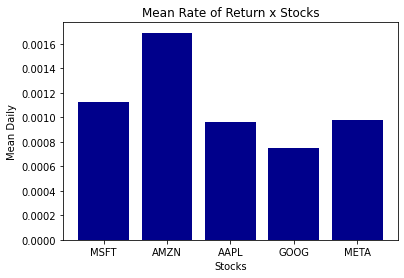

In [83]:
# 3. The mean of each tech stock's daily simple rate of return
mean_daily_return = daily_return.mean()
print(mean_daily_return)

#Plotting bar chart
ax7 = plt.subplot()
ax7.set_xticks(range(len(symbols)))
ax7.set_xticklabels(symbols)
plt.bar(range(len(symbols)), mean_daily_return, color = 'darkblue')
plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')
plt.show()


From the above graph we conclude that that Amazon has high daily mean returns and Google has the lowest daily mean returns.

AAPL    0.000748
AMZN    0.001310
GOOG    0.000375
META    0.000639
MSFT    0.000404
dtype: float64


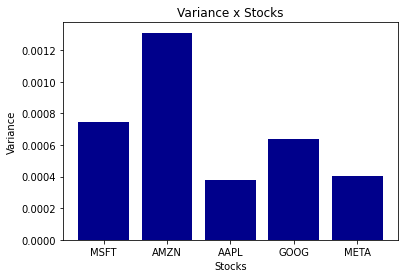

In [82]:
# 4. Calculate and visualize the variance.
variance_daily_return = daily_return.var()
print(variance_daily_return)

#Plotting bar chart
ax8 = plt.subplot()
ax8.set_xticks(range(len(symbols)))
ax8.set_xticklabels(symbols)
plt.bar(range(len(symbols)), variance_daily_return, color = 'darkblue')
plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')
plt.show()


From the above graph we conclude that Amazon has high Variance and Apple has the lowest variance.

AAPL    0.027352
AMZN    0.036192
GOOG    0.019373
META    0.025274
MSFT    0.020108
dtype: float64


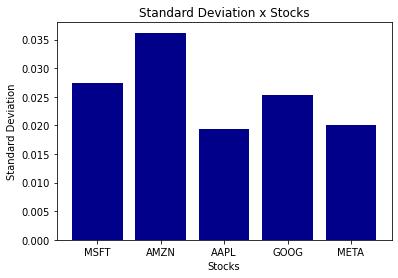

In [70]:
# 5. Calculate and visualize the standard deviation
sd_daily_return = daily_return.std()
print(sd_daily_return)

#Plotting bar chart
ax9 = plt.subplot()
ax9.set_xticks(range(len(symbols)))
ax9.set_xticklabels(symbols)
plt.bar(range(len(symbols)), sd_daily_return, color = 'darkblue')
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation x Stocks')
plt.show()

From the above graph we conclude that Amazon has high deviation and Apple has the lowest deviation.

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.322412  0.520758  0.434558  0.407812
AMZN  0.322412  1.000000  0.509218  0.491784  0.405858
GOOG  0.520758  0.509218  1.000000  0.540549  0.564533
META  0.434558  0.491784  0.540549  1.000000  0.462011
MSFT  0.407812  0.405858  0.564533  0.462011  1.000000


Text(0.5, 1.0, 'Correlation of stock closing price')

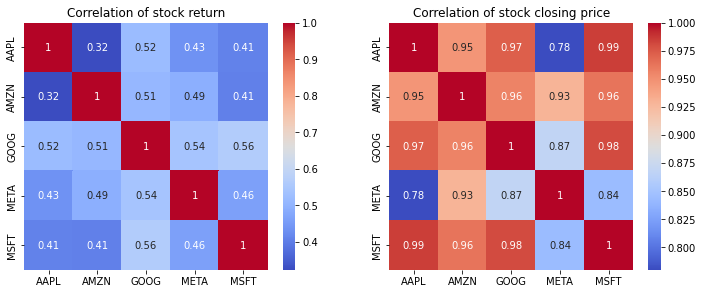

In [71]:
# 6. Calculate the correlations
correlation= daily_return.corr()
print(correlation)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(daily_return.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adj_date.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock closing price')

The graph above taught us that two variables have a positive correlation when their values change in tandem. The diagonal yellow lines of both pictures indicate that "1" indicates the optimum positive correlation.

*Correlation strength*:

i. A correlation with a medium or moderate correlation has a correlation coefficient between 0.30 and 0.49.

ii. A coefficient value between 0.50 and 1 is regarded as indicating a strong or high association.

iii. When the result is less than +.29, it is said to have a small or poor correlation.

iv. If the value is near to 1, it is argued that a perfect correlation exists.

v. If the value is zero, then there is no association.

vi. The stock return graph reveals that META and MSFT have a moderate 0.46 association.

vii. There is a strong link between GOOG and META (0.56).

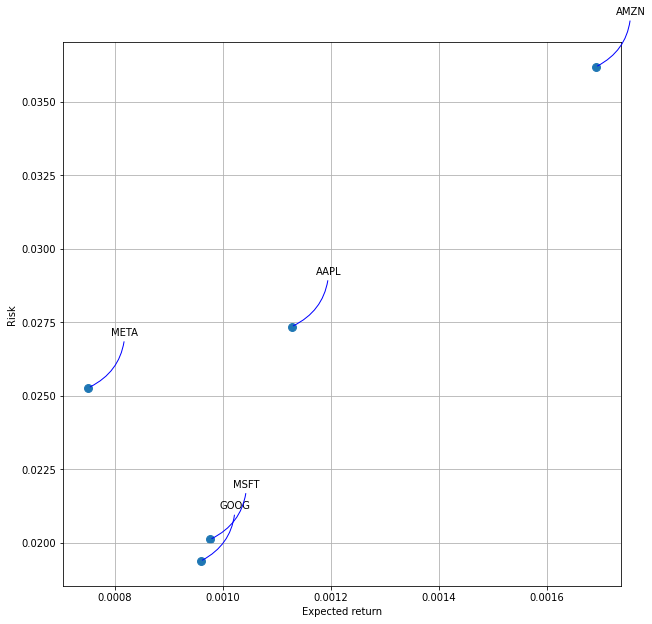

In [72]:
# 7. How much value do we put at risk by investing in a particular stock?
rets = daily_return.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 10))
plt.scatter(daily_return.mean(), daily_return.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.grid()

for label, x, y in zip(rets.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**How much value do we put at risk by investing in a particular stock?**

The above graph shows that we can invest in all the companies according to the risk and expected returns 

**Amazon** has high returns as well as high risk so if you are a risk taker you can invest into it but according to our analysis Amazon is good for long term investment with proper risk management.

**Apple** has moderate risk and moderate expected return so it is good for long term as well as short term investment.

**Meta** has high risk and low expected return so it is not good for investment though if you want to take risk you can invest in it.

**Microsoft** and **Google** has low risk and high expected returns so it is good for long term investment.


In [73]:
# Using plotly.express for individual plotting of all stocks.
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="AAPL")
fig.show()
fig = px.line(df, x='date', y="FB")
fig.show()
fig = px.line(df, x='date', y="MSFT")
fig.show()
fig = px.line(df, x='date', y="GOOG")
fig.show()
fig = px.line(df, x='date', y="AMZN")
fig.show()